In [216]:
#Main file for research
import pandas as pd
from numpy import *
from math import *
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
cpp = pd.read_excel("./ConstantPrintParamaters.xlsx")
tbv = pd.read_excel("./Track_Stats_Summary.xlsx")
tbv.columns = ("1 1 i ps3 ps4 ps5 ps6 1 pa3 pa4 pa5 pa6 1 am3 am4 am5 am6 1 as3 as4 as5 as6").split(' ')
tbv.drop(columns=['1'], inplace=True)
tbv.drop([0,1,2], inplace = True)
tbv.set_index('i', inplace = True)
cpp.columns = ('1,1,i,pow,speed,hatch,1,am3,am4,am5,am6,amall,1,as3,as4,as5,as6,asall').split(',')
cpp.drop(columns=['1'],inplace=True)
cpp.drop([0,1,2,3], inplace=True)
cpp['areamedian'] = [list(cpp.iloc[i][4:9].values) for i in range(len(cpp.index))]
cpp['areastd'] = [list(cpp.iloc[i][9:14].values) for i in range(len(cpp.index))]
cpp.drop(columns=('am3,am4,am5,am6,amall,asall,as3,as4,as5,as6').split(','),inplace=True)
tbv['powset'] = [list(tbv.iloc[i][0:4].values) for i in range(len(tbv.index))]
tbv['powact'] = [list(tbv.iloc[i][4:8].values) for i in range(len(tbv.index))]
tbv['areamedian'] = [list(tbv.iloc[i][8:12].values) for i in range(len(tbv.index))]
tbv['areastd'] = [list(tbv.iloc[i][12:16].values) for i in range(len(tbv.index))]
tbv.drop(columns=('ps3,ps4,ps5,ps6,am3,am4,am5,am6,pa3,pa4,pa5,pa6,as3,as4,as5,as6').split(','),inplace=True)

datatbv = {}
names = ['powset','powact','areamed','areastd']
for i in range(4):
    dtemp = tbv.copy()
    for z in range(4):
        tempcol = tbv.iloc[:,z].values
        tempin = []
        
        for j in range(len(dtemp.index)):
            tempin.append(tempcol[j][i])
        dtemp[names[z]] = tempin
    datatbv['l'+str(i+3)] = dtemp
tbv['areamean'] = [mean(list(tbv.iloc[i]['areamedian'])) for i in range(len(tbv.index))]
tbv['stdmean'] = [mean(list(tbv.iloc[i]['areastd'])) for i in range(len(tbv.index))]
cpporiginal = pd.read_excel("./ConstantPrintParamaters.xlsx")
cpporiginal.columns = ('1,1,i,pow,speed,hatch,1,am3,am4,am5,am6,amall,1,as3,as4,as5,as6,asall').split(',')
cpporiginal.drop(columns=['1'],inplace=True)
cpporiginal.drop([0,1,2,3], inplace=True)



<AxesSubplot:>

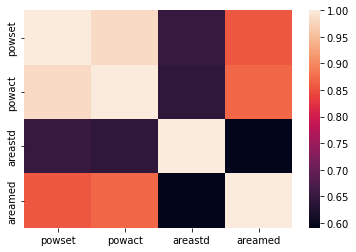

In [218]:
sns.heatmap(datatbv['l3'].corr())

<AxesSubplot:>

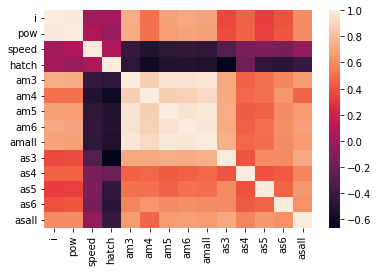

In [219]:
sns.heatmap(cpporiginal.astype(float).corr())